### Metro Interstate Traffic Volume
* Real and Integral data
* Multivariate, Sequential, Time-Series

Information:
* holiday    ----- Categorical   ----- US National holidays plus regional holiday, Minnesota State Fair
* temp         -----          Numeric     -----  Average temp in kelvin
* rain_1h       -----         Numeric     -----   Amount in mm of rain that occurred in the hour
* snow_1h       -----         Numeric     -----   Amount in mm of snow that occurred in the hour
* clouds_all    -----         Numeric     -----   Percentage of cloud cover
* weather_main   -----        Categorical -----   Short textual description of the current weather
* weather_description  -----  Categorical -----   Longer textual description of the current weather
* date_time         -----     DateTime    -----   Hour of the data collected in local CST time
* traffic_volume    -----     Numeric     -----   Hourly I-94 ATR 301 reported westbound traffic volume

#### Some key points:
* For time series Vs Value - Line chart
* For numeric Vs numeric - Correlation / Scatter plot
* For single distribution - Histogram
* Categorical Vs numeric - Bar chart(mostly) or Pie chart
* For fractional data - Bar chart

#### Import data from live url

In [6]:
url="https://archive.ics.uci.edu/static/public/492/metro+interstate+traffic+volume.zip"

In [7]:
import requests
response = requests.get(url)

#### Read data from url

In [8]:
with open ("Metro Interstate Traffic Volume.zip", "wb") as f:
    f.write(response.content)

In [9]:
import zipfile
with zipfile.ZipFile("Metro Interstate Traffic Volume.zip") as zipped:
    zipped.extractall("Metro Interstate Traffic Volume")

In [10]:
import pandas as pd
i_94 = pd.read_csv(r"C:\Users\heros\Documents\CS\PGD\Data Visualization\Day-07 (Metro Interstate Traffic Volume)\Metro Interstate Traffic Volume\Metro_Interstate_Traffic_Volume.csv")

#### Applying some methods

In [11]:
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [12]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


To check whether there is any null value in data or not - use 'not null'

In [13]:
bol= i_94["holiday"].notnull()
bol
# Note: Answer is False - means no null value

0        False
1        False
2        False
3        False
4        False
         ...  
48199    False
48200    False
48201    False
48202    False
48203    False
Name: holiday, Length: 48204, dtype: bool

In [14]:
i_94[bol]
# It tells the value of all holidays

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
126,Columbus Day,273.080,0.00,0.0,20,Clouds,few clouds,2012-10-08 00:00:00,455
1123,Veterans Day,288.120,0.00,0.0,87,Clear,sky is clear,2012-11-12 00:00:00,1000
1370,Thanksgiving Day,278.540,0.00,0.0,20,Mist,mist,2012-11-22 00:00:00,919
2360,Christmas Day,264.400,0.00,0.0,90,Clouds,overcast clouds,2012-12-25 00:00:00,803
2559,New Years Day,263.490,0.00,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
...,...,...,...,...,...,...,...,...,...
44441,Memorial Day,299.487,0.00,0.0,24,Clouds,few clouds,2018-05-28 00:00:00,1088
45547,Independence Day,297.550,0.00,0.0,1,Mist,mist,2018-07-04 00:00:00,1021
46936,State Fair,289.020,0.00,0.0,1,Clear,sky is clear,2018-08-23 00:00:00,596
47330,Labor Day,292.430,0.25,0.0,1,Rain,light rain,2018-09-03 00:00:00,962


To check whether there is any null value in data or not - use 'isnull'. In answer it tells 'true' because python take none as 'none' data type. So we have to convert it into string

In [15]:
bol1_null = i_94["holiday"].isnull()
bol1_null

0        True
1        True
2        True
3        True
4        True
         ... 
48199    True
48200    True
48201    True
48202    True
48203    True
Name: holiday, Length: 48204, dtype: bool

In [16]:
i_94["holiday"][bol1_null] = "None" #none is replace by "none" string in data frame

# Or can also use fillna
# i_94["holiday"].fillna("None")

C:\Users\heros\AppData\Local\Temp\ipykernel_15276\4224185448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_94["holiday"][bol1_null] = "None" #none is replace by "none" string in data frame


#### Applying some methods on dataframe

In [17]:
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [18]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [19]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [20]:
i_94.traffic_volume.describe()

# max = 7280 (means range = 0-7280)
# average traffic - mean = 3259
# 25% = means 1193 or less (or we can say for 75% = 1193 or more)
# 75% = means 4933 or less (or we can say for 25% = 4933 or more)

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

#### Goal: To analyze data - to check what are the indicators of traffic volume

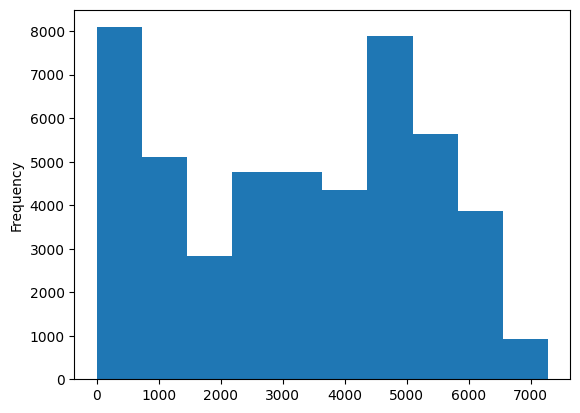

In [21]:
# graph between traffic volume and other indicators
import matplotlib.pyplot as plt 
i_94.traffic_volume.plot.hist()
plt.show()

Converting data into two parts: Day and Night
* Day: 7AM to 7PM (12 hours)
* Night: 7PM to 7AM (12 hours)

In [22]:
# converting date into datetime
i_94.date_time = pd.to_datetime(i_94.date_time)

Now, applying some methods on dataframe

In [23]:
i_94.date_time.dtype

dtype('<M8[ns]')

In [24]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [25]:
i_94.date_time

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [26]:
i_94.date_time.dt.hour       # to extract hour from data

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int32

### Extracting data for day and night separately

##### Day Data

In [69]:
day_bol = (i_94.date_time.dt.hour >= 7) & (i_94.date_time.dt.hour < 19)

In [70]:
day = i_94[day_bol].copy()
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


Applying methods on datetime of day data

In [29]:
day.date_time.min()    # min date and time data

Timestamp('2012-10-02 09:00:00')

In [30]:
day.date_time.max()       # max date and time data 

Timestamp('2018-09-30 18:00:00')

In [31]:
day.date_time.dt.time.min()    # min time data

datetime.time(7, 0)

In [32]:
day.date_time.dt.time.max()    # max time data

datetime.time(18, 0)

In [33]:
day.date_time.dt.hour.unique()    # values of day data

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,  8,  7])

##### Night Data

In [34]:
night_bol = (i_94.date_time.dt.hour >= 19) | (i_94.date_time.dt.hour < 7)
night = i_94[night_bol]

# here
# 0 ,    1,    2,  3,   4,   5,   6,    19,  20,  21,  22,   23
# 12am, 1am, 2am, 3am, 4am, 5am, 6am / 7pm, 8pm, 9pm, 10pm, 11pm

# Between Interval from 7am to 6pm - morning time

Applying methods on datetime of night data

In [35]:
night.date_time.dt.time.max()    # max time data

datetime.time(23, 0)

In [36]:
night.date_time.dt.time.min()    # min time data

datetime.time(0, 0)

In [37]:
night.date_time.dt.hour.unique()      # values of night data

array([19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6])

#### Histogram for Day and Night data and Traffic volume separately

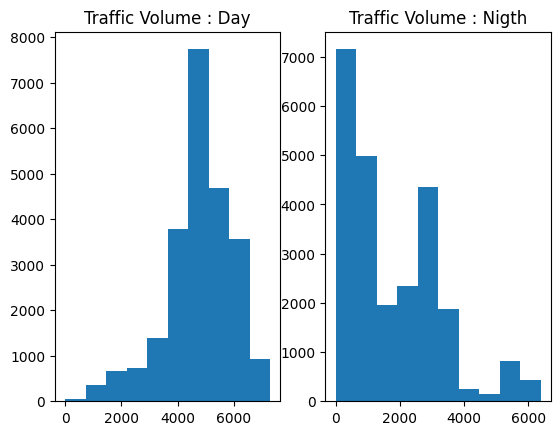

In [38]:
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume : Day")  

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Traffic Volume : Nigth")

plt.show()    
# Note: In below histogram y-axis is not same for both graphs
# Figure size is not same for both graphs

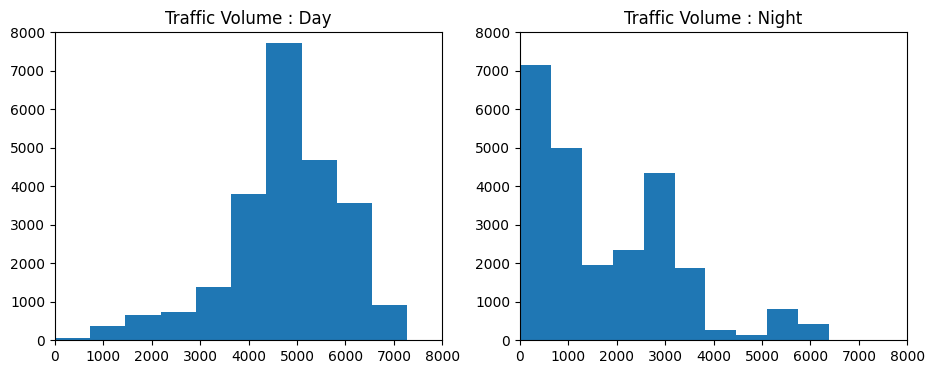

In [39]:
plt.figure(figsize= (11, 4))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Traffic Volume : Day")
plt.xlim(0,8000)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Traffic Volume : Night")
plt.xlim(0,8000)
plt.ylim(0,8000)

plt.show()

Description of Day and Night data 

In [40]:
day_description = day.traffic_volume.describe()
day_description

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [41]:
night_description = night.traffic_volume.describe()
night_description

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

To convert series into DataFrame

In [42]:
day_night_descript = pd.DataFrame(day_description)

In [43]:
day_night_descript.columns   

Index(['traffic_volume'], dtype='object')

In [44]:
day_night_descript.columns = ["Day"]     # converting day description into DataFrame

In [45]:
day_night_descript     # print Data

,Day
count,23877.000000
mean,4762.047452
std,1174.546482
min,0.000000
25%,4252.000000
50%,4820.000000
75%,5559.000000
max,7280.000000


In [46]:
day_night_descript["Night"] = night_description   # converting night description into DataFrame

In [47]:
day_night_descript    # combining both Day and Night data in one DataFrame

,Day,Night
count,23877.000000,24327.000000
mean,4762.047452,1785.377441
std,1174.546482,1441.951197
min,0.000000,0.000000
25%,4252.000000,530.000000
50%,4820.000000,1287.000000
75%,5559.000000,2819.000000
max,7280.000000,6386.000000


Note:
According to graph:
* First graph is left skewed which shows that traffic volume is high on daytime.
* While the second graph is right skewed, which shows that trafic volume is low on night time.

According to tabular data:
* 75% data is more than 25% - shows traffic volume is high on daytime.
* 75% data is less - traffic volume is low on nighttime.

If the medain value is in between both 75% and 25% value - which shows that graph is normal

In [48]:
night.shape

(24327, 9)

In [49]:
night.traffic_volume.value_counts(bins = 10).sort_index()

(-6.3870000000000005, 638.6]    7153
(638.6, 1277.2]                 4983
(1277.2, 1915.8]                1950
(1915.8, 2554.4]                2350
(2554.4, 3193.0]                4359
(3193.0, 3831.6]                1872
(3831.6, 4470.2]                 256
(4470.2, 5108.8]                 150
(5108.8, 5747.4]                 821
(5747.4, 6386.0]                 433
Name: count, dtype: int64

##### Check what are the key indicators due to which traffic is high

Time indicators

* Month, 
* Day of Week, 
* Time of Day

#### For Day Data - For month

In [50]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


In [51]:
day.date_time.dt.month     # to extract month from day data

0        10
1        10
2        10
3        10
4        10
         ..
48194     9
48195     9
48196     9
48197     9
48198     9
Name: date_time, Length: 23877, dtype: int32

In [52]:
day["month"] = day.date_time.dt.month       # creating month column in the data frame

C:\Users\heros\AppData\Local\Temp\ipykernel_15276\2934940233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["month"] = day.date_time.dt.month       # creating month column in the data frame


In [53]:
day      # checking if the 'month' column is added in dataframe or not

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10
...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9


In [54]:
day.date_time.dt.strftime("%B")    # to check month nanme according to month number - it prints full name
# day.date_time.dt.strftime("%b")    # to check month nanme according to month number - it prints half anme

0          October
1          October
2          October
3          October
4          October
           ...    
48194    September
48195    September
48196    September
48197    September
48198    September
Name: date_time, Length: 23877, dtype: object

In [55]:
day["month_name"]= day.date_time.dt.strftime("%B")    # adding another column of month name in the data frame

C:\Users\heros\AppData\Local\Temp\ipykernel_15276\331770806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["month_name"]= day.date_time.dt.strftime("%B")    # adding another column of month name in the data frame


In [56]:
day      # checking if the 'monthname' column is added in dataframe along with 'month' column

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,month_name
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,October
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,October
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,October
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,October
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,October
...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,September
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,September
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,September
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,September


Groupby data according to month name - it gives answer without order of month\
So it is recommended to use numerical data for groupby. Because numeric data can easily be ordered.

In [57]:
groups = day.groupby("month_name")
groups["traffic_volume"].mean()

month_name
April        4906.894305
August       4928.302035
December     4374.834566
February     4711.198394
January      4495.613727
July         4595.035744
June         4898.019566
March        4889.409560
May          4911.121609
November     4704.094319
October      4921.234922
September    4870.783145
Name: traffic_volume, dtype: float64

In [58]:
groups = day.groupby("month")
by_month = groups["traffic_volume"].mean()
by_month

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Line Plot between months of day data

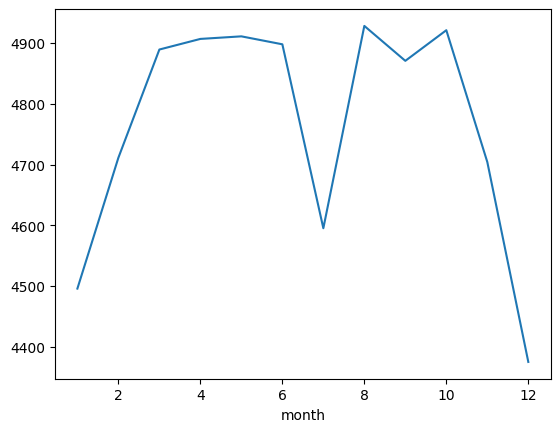

In [59]:
by_month.plot.line()
plt.show()
# Note: It shows that in winter there is low traffic - as end and beginning of month shows low values
# While in summer there is high traffic - as in between values of month shos high graph
# But there is a drip at 7 (that is july) - It is due to there is construction happening in this year

Add Year Column in Data Frame

In [60]:
day.date_time.dt.year

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
48194    2018
48195    2018
48196    2018
48197    2018
48198    2018
Name: date_time, Length: 23877, dtype: int32

In [61]:
day["year"] = day.date_time.dt.year

C:\Users\heros\AppData\Local\Temp\ipykernel_15276\3951727864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day["year"] = day.date_time.dt.year


In [62]:
day      # checking if the 'year' column is added in dataframe 

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,month_name,year
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,October,2012
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,October,2012
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,October,2012
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,October,2012
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,October,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,September,2018
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,September,2018
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,September,2018
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,September,2018


Extract only data of july month

In [63]:
only_july = day[day["month"] == 7]
only_july

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,month_name,year
7350,None,289.15,0.0,0.0,75,Clouds,broken clouds,2013-07-01 07:00:00,6783,7,July,2013
7351,None,291.59,0.0,0.0,1,Clear,sky is clear,2013-07-01 08:00:00,5742,7,July,2013
7352,None,294.15,0.0,0.0,1,Clear,sky is clear,2013-07-01 09:00:00,4764,7,July,2013
7353,None,295.60,0.0,0.0,1,Clear,sky is clear,2013-07-01 10:00:00,4669,7,July,2013
7354,None,297.15,0.0,0.0,1,Clear,sky is clear,2013-07-01 11:00:00,4863,7,July,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
46313,None,301.29,0.0,0.0,20,Clouds,few clouds,2018-07-31 14:00:00,4922,7,July,2018
46314,None,301.43,0.0,0.0,40,Clouds,scattered clouds,2018-07-31 15:00:00,5722,7,July,2018
46315,None,302.00,0.0,0.0,40,Clouds,scattered clouds,2018-07-31 16:00:00,6357,7,July,2018
46316,None,302.29,0.0,0.0,20,Clouds,few clouds,2018-07-31 17:00:00,5912,7,July,2018


In [64]:
only_july.groupby("year")["traffic_volume"].mean()   # mean of july data for all years

year
2013    4914.354054
2014    4871.598240
2015    4613.146226
2016    3924.923645
2017    4734.120301
2018    4586.899543
Name: traffic_volume, dtype: float64

Checking in which year there is a drip for july month

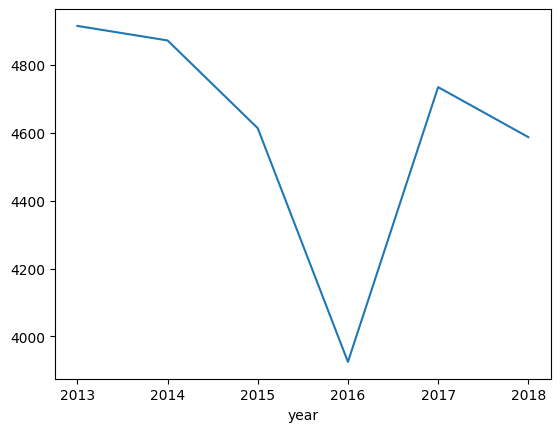

In [65]:
only_july.groupby("year")["traffic_volume"].mean().plot.line()
plt.show()   

Day # 8

#### For Day Data - Day of Week

In [78]:
day["dayofweek"].unique()
# Here it tells that 0=Monday, 1=Tuesday

array([1, 2, 3, 4, 5, 6, 0])

In [71]:
day["dayofweek"] = day.date_time.dt.dayofweek   # add day of week column in data

In [72]:
day["dayinwords"] = day.date_time.dt.strftime("%A") # add day of week in words column in data

In [73]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,dayinwords
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,Tuesday
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,Tuesday
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,Tuesday
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,Tuesday
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,6,Sunday
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,6,Sunday
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,6,Sunday
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,6,Sunday


To extract only Monday data

In [74]:
day[day["dayinwords"]== "Monday"]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,dayinwords
133,None,270.01,0.0,0.0,20,Clouds,few clouds,2012-10-08 07:00:00,6676,0,Monday
134,None,271.23,0.0,0.0,20,Clouds,few clouds,2012-10-08 08:00:00,5966,0,Monday
135,None,273.71,0.0,0.0,20,Clouds,few clouds,2012-10-08 09:00:00,4832,0,Monday
136,None,276.77,0.0,0.0,20,Clouds,few clouds,2012-10-08 10:00:00,4395,0,Monday
137,None,279.47,0.0,0.0,20,Clouds,few clouds,2012-10-08 11:00:00,4411,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...
48035,None,296.00,0.0,0.0,40,Clouds,scattered clouds,2018-09-24 14:00:00,4816,0,Monday
48036,None,296.52,0.0,0.0,75,Clouds,broken clouds,2018-09-24 15:00:00,5443,0,Monday
48037,None,297.04,0.0,0.0,1,Clear,sky is clear,2018-09-24 16:00:00,6307,0,Monday
48038,None,296.79,0.0,0.0,1,Clear,sky is clear,2018-09-24 17:00:00,5562,0,Monday


In [76]:
avg_dayofweek = day.groupby("dayofweek")["traffic_volume"].mean()   # average of all seven days with the traffuc volume
avg_dayofweek 

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

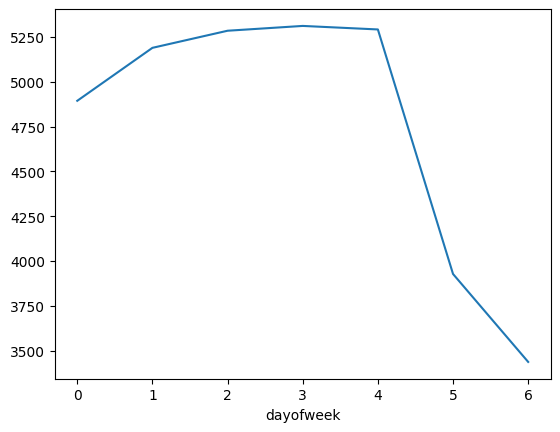

In [80]:
avg_dayofweek.plot.line()  # Line chart for time series data
plt.show()
# Note: The graph shows that 5,6 and 0 has less traffic as compared to 1,2,3 and 4
# means Sat, Sun and Mon has less traffic as compare to Tues, Wed, Thurs and Fri

# Another way to write:
# avg_dayofweek.plot(kind = "line")
# plt.show()

Extracting hour data from the overall data

In [83]:
day["hour"] = day.date_time.dt.hour   # adding an hour column in the data

In [82]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,dayinwords,hour
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,Tuesday,9
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,Tuesday,10
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,Tuesday,11
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,Tuesday,12
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,Tuesday,13
...,...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,6,Sunday,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,6,Sunday,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,6,Sunday,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,6,Sunday,17


Extracting data for Mon, Tues, Wed, Thurs and Friday

In [84]:
weekdays = day[day["dayofweek"] <= 4]
weekdays

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,dayinwords,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,Tuesday,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,Tuesday,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,Tuesday,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,Tuesday,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,Tuesday,13
...,...,...,...,...,...,...,...,...,...,...,...,...
48143,None,285.00,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 14:00:00,5193,4,Friday,14
48144,None,285.14,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 15:00:00,5838,4,Friday,15
48145,None,285.33,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 16:00:00,6188,4,Friday,16
48146,None,285.24,0.0,0.0,75,Clouds,broken clouds,2018-09-28 17:00:00,5695,4,Friday,17


Extracting data for Saturday and Sunday (Weekends)

In [85]:
weekend = day[~ (day["dayofweek"] <= 4)]
weekend

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,dayofweek,dayinwords,hour
87,None,275.17,0.00,0.0,1,Clear,sky is clear,2012-10-06 07:00:00,2072,5,Saturday,7
88,None,274.99,0.00,0.0,1,Clear,sky is clear,2012-10-06 08:00:00,3342,5,Saturday,8
89,None,275.09,0.00,0.0,40,Clouds,scattered clouds,2012-10-06 09:00:00,4258,5,Saturday,9
90,None,276.88,0.00,0.0,20,Clouds,few clouds,2012-10-06 10:00:00,4861,5,Saturday,10
91,None,278.04,0.00,0.0,20,Clouds,few clouds,2012-10-06 11:00:00,5191,5,Saturday,11
...,...,...,...,...,...,...,...,...,...,...,...,...
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,6,Sunday,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,6,Sunday,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,6,Sunday,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,6,Sunday,17


To check on which hour traffic is greater --> We use pivot table between hour and traffic volume of weekdays data

In [86]:
weekdays.pivot_table(index = "hour", values="traffic_volume",)

,traffic_volume
hour,
7,6030.413559
8,5503.497970
9,4895.269257
10,4378.419118
11,4633.419470
12,4855.382143
13,4859.180473
14,5152.995778
15,5592.897768


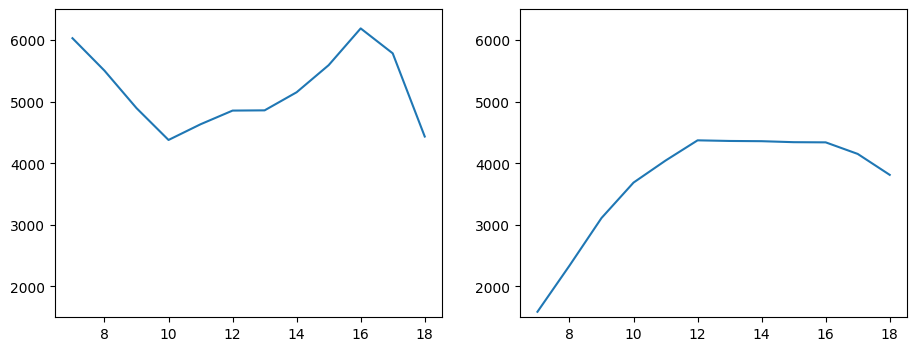

In [88]:
plt.figure(figsize = (11,4))
plt.subplot(1,2,1)

hourly_weekday_avg = weekdays.pivot_table(index = "hour", values="traffic_volume")   # For weekdays data
plt.plot(hourly_weekday_avg.index, hourly_weekday_avg)
plt.ylim(1500,6500)

plt.subplot(1,2,2)

hourly_weekend_avg = weekend.pivot_table(index = "hour", values="traffic_volume") # For weekend data
plt.plot(hourly_weekend_avg.index, hourly_weekend_avg)
plt.ylim(1500,6500)

plt.show()

Correlation of all numeric data

In [89]:
day.select_dtypes(include = "number").corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,dayofweek,hour
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317,0.000188,0.162691
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697,-0.009683,0.008279
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265,-0.008814,0.003923
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932,-0.041980,0.023685
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000,-0.416453,0.172704
dayofweek,0.000188,-0.009683,-0.008814,-0.041980,-0.416453,1.000000,-0.002767
hour,0.162691,0.008279,0.003923,0.023685,0.172704,-0.002767,1.000000


In [91]:
day.select_dtypes(include = "number").corr()["traffic_volume"]
# correlation of all numeric values with traffic volume
# Note: It does not shows much difference, which means all values scatter at one place

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

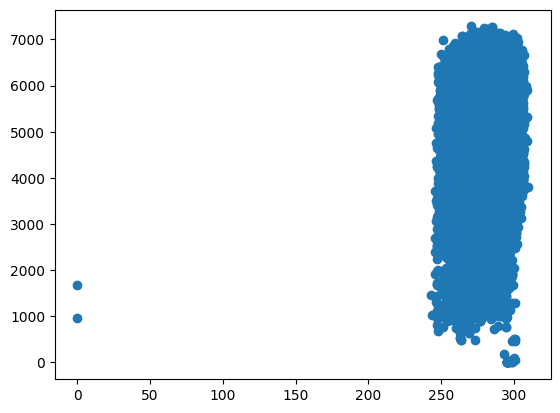

In [92]:
plt.scatter(day["temp"], day.traffic_volume)
plt.show()

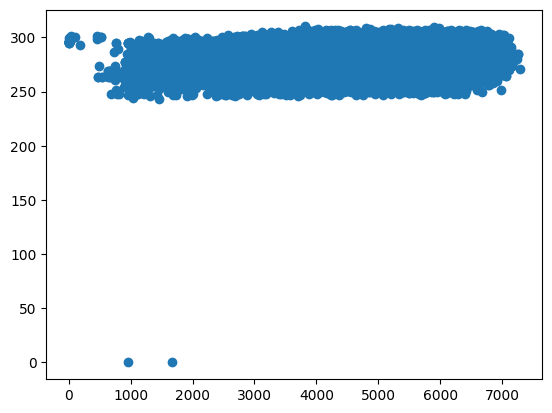

In [93]:
plt.scatter(day.traffic_volume, day["temp"], )
plt.show()

#### For Day Data - For Weather Condition

In [94]:
day["weather_main"].value_counts()

weather_main
Clouds          8702
Clear           5744
Rain            2841
Mist            2593
Snow            1454
Drizzle          883
Haze             834
Thunderstorm     451
Fog              362
Smoke             12
Squall             1
Name: count, dtype: int64

In [95]:
day.weather_main.unique().size

11

In [96]:
day.weather_main.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Smoke', 'Squall'], dtype=object)

In [98]:
day.groupby("weather_main")["traffic_volume"].mean()
# Note: here we can see that maximum value is near 4000, but in actual day data actual value in near 7000 which means that weather doesnot effect much on traffic volume

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

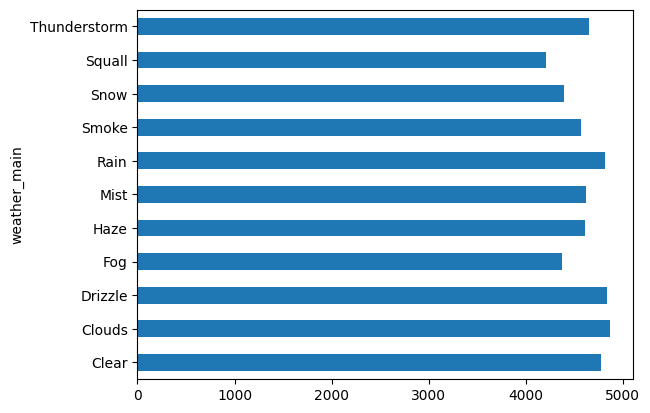

In [99]:
day.groupby("weather_main")["traffic_volume"].mean().plot.barh()
plt.show()

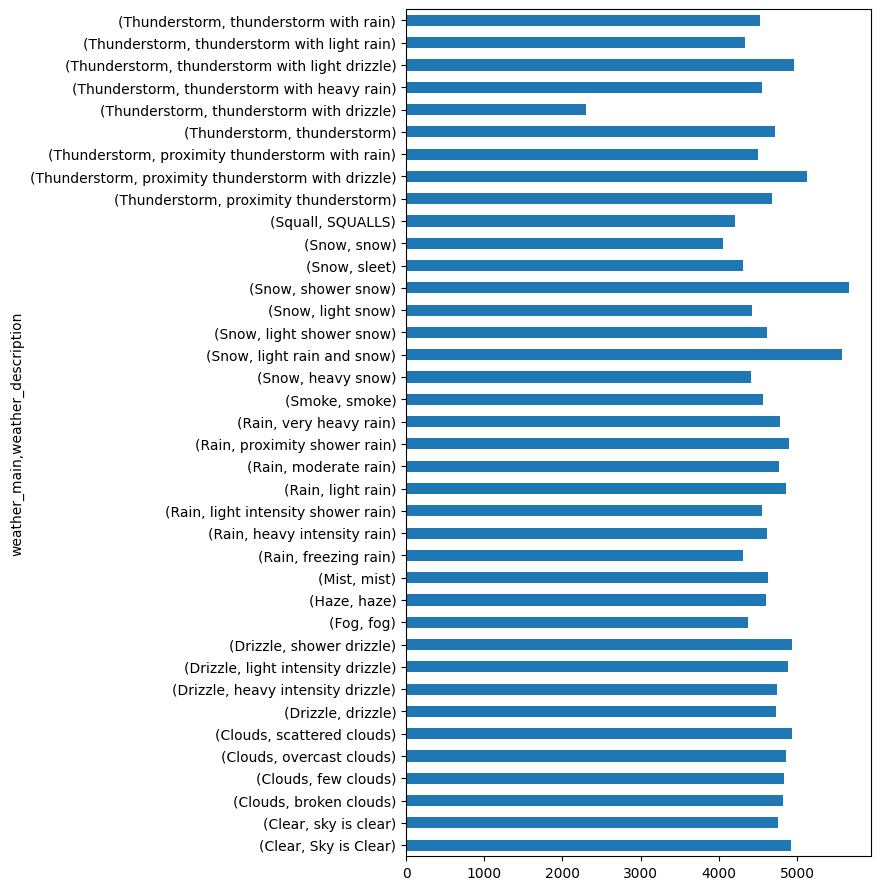

In [101]:
plt.figure(figsize = (6,11))
day.groupby(["weather_main","weather_description"])["traffic_volume"].mean().plot.barh() # more detailed graph
plt.show()

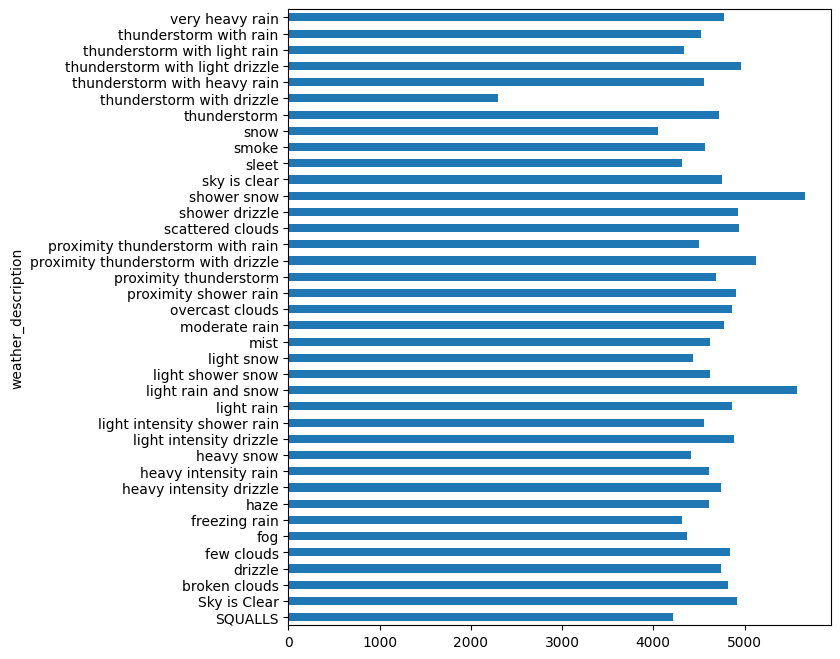

In [104]:
plt.figure(figsize=(7,8))
day.groupby("weather_description")["traffic_volume"].mean().plot.barh()
plt.show()
# Note: This plot shows that how much weather factors are actually affecting traffic volume

In [105]:
day["weather_description"].value_counts().sort_values(ascending = False)

weather_description
sky is clear                           4892
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
Sky is Clear                            852
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm

In [106]:
day["weather_description"] = day["weather_description"].str.replace("Sky is Clear","sky is clear")

In [108]:
day["weather_description"].value_counts().sort_values(ascending = False)
# Note: It shows that mostly the sky is clear

weather_description
sky is clear                           5744
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm with light rain             23
thunderstorm